<a href="https://colab.research.google.com/github/livingMabhijit/NLP_talks/blob/master/textClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is an example of multinomial naive bayes implimantation for text classification. Have a look.

Here we are gonna use 2onewsgroup for the corpus creation then we will do the word count, frequency analysis ans so on. 

In [3]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
print(data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
for topic in data.target_names:
  print(topic)

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


Here are the topics that all the documents are classified for. 

In [7]:
#just for simplicity lets take 5-6 target types for quick training and test..
topic_types = ['alt.atheism', 'comp.os.ms-windows.misc', 'rec.autos','misc.forsale', 'sci.space', 'soc.religion.christian', 'talk.politics.mideast']
train_set = fetch_20newsgroups(subset='train',categories=topic_types)
test_set = fetch_20newsgroups(subset='test', categories=topic_types)

In [8]:
# let's have a look at the sample training data
print(train_set.data[2])

From: frp@table.NSD.3Com.COM (Frank R. Pereira)
Subject: Moving Sale
Distribution: ba
Organization: 3Com Corporation
Lines: 10
Nntp-Posting-Host: table.nsd.3com.com

Moving Sale: Must sell before May 5:
Futon:  high-end, oak, queen, like new -- $250
Computer Desk:  roll-top, locks securely, like new -- $100
Color TV:  13", perfect cond., great for bedroom -- $50	( ***SOLD)
Coffee Tables/Dresser:  $40 or B.O.
Lamps:  $10
Make an offer!!

Ask for Esther: 415/571-6062 eve
		408/736-0490 day



Ok, it's time to tokenize...so TFIDF here it comes..


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model= make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_set.data,train_set.target)
labels = model.predict(test_set.data)

Here I just created the model with tokens generated by TFIDF and fit the model to predict test data set data.

In [16]:
#so just for your curiosity the label is a list with all the predicted type of the class.
print(labels.data[1])

4


Let's see how did our model has predicted by some evaluation matrix

In [17]:
from sklearn.metrics import confusion_matrix
my_matrix = confusion_matrix(test_set.target,labels) 
print(my_matrix) 

[[170   0   0   1   4 131  13]
 [  1 337   1  10  10  35   0]
 [  0   9 329  25   4  19   4]
 [  0   1   5 380   4   5   1]
 [  0   2   1   3 364  24   0]
 [  2   0   0   0   5 391   0]
 [  0   0   0   0   0  30 346]]


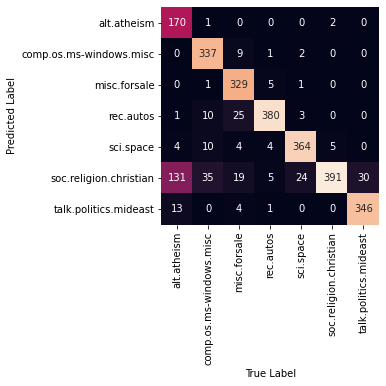

In [20]:
# hmmmmm.. let's make it little beautiful..by SEABORN!!
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(my_matrix.T,square = True, annot=True, fmt='d',cbar=False,xticklabels=train_set.target_names,yticklabels=train_set.target_names)
plt.xlabel('True Label')
plt.ylabel("Predicted Label")
plt.show()

Not that bad, but it could be better... with some other classifier though...

In [21]:
# so let's try some sentences to check how our model performing...
def topic_predict(text, train = train_set, model = model):
  prediction_text = model.predict([text])
  return train_set.target_names[prediction_text[0]]

In [22]:
topic_predict('spacex recently sent an rocket to international space station ans make to back to earth')

'sci.space'

In [24]:
topic_predict('The mother of sheldon, marry is a big fan of jesus' )

'soc.religion.christian'

In [27]:
topic_predict('hey, you have to accept that, you got this apartment in a great price.')

'soc.religion.christian'

In [33]:
topic_predict('Modi is one of the best prime minister of india')

'talk.politics.mideast'

In [35]:
topic_predict('bill gates, such a amazing person for whom we can use excel and powerpoint')

'soc.religion.christian'

In [36]:
topic_predict('I prefer apple operating system that windows')

'comp.os.ms-windows.misc'

As it's evident in some cases its performing bad as .... but yeah it's a simple implementation of text classification. But the corpus has to complete with the topic cluster so that you can build the custom classifer on the top of that corpus. Given sometimes these are domain specific,so remember that!!
